#  ZTDL 4: Deep Learning Intro – Iris

## Opdracht 5.3 vragen

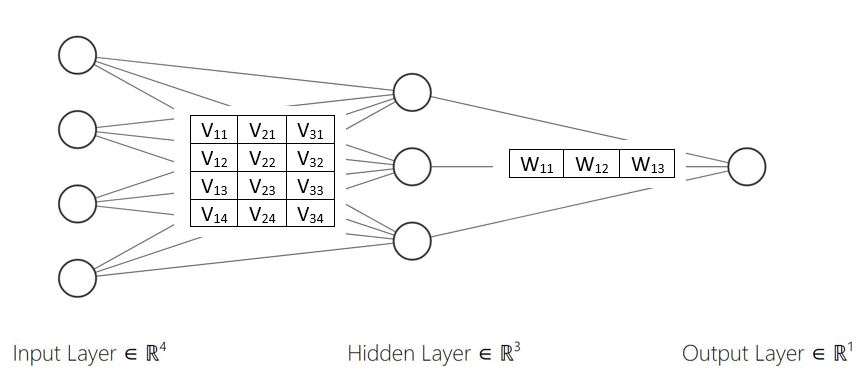

In [1]:
# b. Maak een schets van het neurale netwerk. Geef daarin de weegfactoren weer die moeten
# worden bepaald tijdens de training. Hoeveel lagen heeft dit netwerk?

#     This network contains 3 layers. It has the input layer, one hidden/deep layer and the output layer.
#     Each neuron has a weight factor. Example is a node from the input layer. It contains 3
#     input connections and 3 biases. In total there are 15 weight factors inbetween the input 
#     and first hidden layer.

#     Input -> Hidden layer : 15 weight factors (12 input connections and 3 biases).
#     Hidden layer -> Output : 4 weight factors (3 input connections and 1 biases).

from PIL import Image

img = Image.open('../data/opdracht5_3.jpg')
img

In [2]:
# c. In dit model wordt als activation function softmax gebruikt. Waarom wordt daarvoor hier
# gekozen?

#    takes a set of values, and effectively picks the biggest one, so, for example, 
#    if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], 
#    it saves you from fishing through it looking for the biggest value, and turns it into [0, 0, 0, 0, 1, 0, 0, 0, 0]. 
#    The goal is to save a lot of coding

# d. Onderzoek de invloed van de learning rate op het leerproces. Probeer verschillende waarden
# uit. Kijk ook welke informatie je hierover kunt vinden op het Internet. Wat is je conclusie?

#     I used 3 different learning rates to determine the influence it has on the outcome. 
#     The precision, recall and f1-score change depending on the learning rate. 

# e. Is hier sprake van overfitting? Licht je antwoord toe.

#     Overfitting only happens when the traning of the neural network performs very well with 
#     training dataset but fails with test dataset. This instance if the learning rate is high than 0.00x 
#     then both datasets will perform well. There is only overfitting when the learning rate is below 0.00x

# f. Leg de betekenis van de waarden in het classification report uit, t.w. precision, recall en f1
# score.

#     Precision : Precision is the fraction of relevant instances among 
#                 the retrieved instances. 
#     Recall : Recall is the fraction of relevant instances that were retrieved. 
#     - Both precision and recall are therefore based on relevance.
#     F-score : The F-score is a measure of a test's accuracy.

# g. Welke conclusie trek je hier uit de scores in het classification report t.a.v. de
# betrouwbaarheid van de Iris classificatie?

#     With a good learning rate, the classification report shows that the Iris identification is 
#     reliable enough to determine whether a picture is an iris or not.

# h. Welke informatie kun je uit de confusion matrix aflezen?

#    It shows how many images or pieces of data based on the following: 
#    True positive             | False negative      | True positive rate 
#    False positive            | True negative       | False positive rate
#    Positive predictive value | false omission rate | Positive likelihood ratio

# i. Leg het belang uit van de informatie die je uit de confusion matrix haalt bij het trekken van
# conclusies.

#     You would wantthe true positives since it will give you the total amount of positive images or data that
#     are irises. You would also want the Positive likelihood ratio since it give the ratio of how likely
#     the ai/machine learning module is able to deterime if its a iris or not.

In [3]:
# Import all important libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

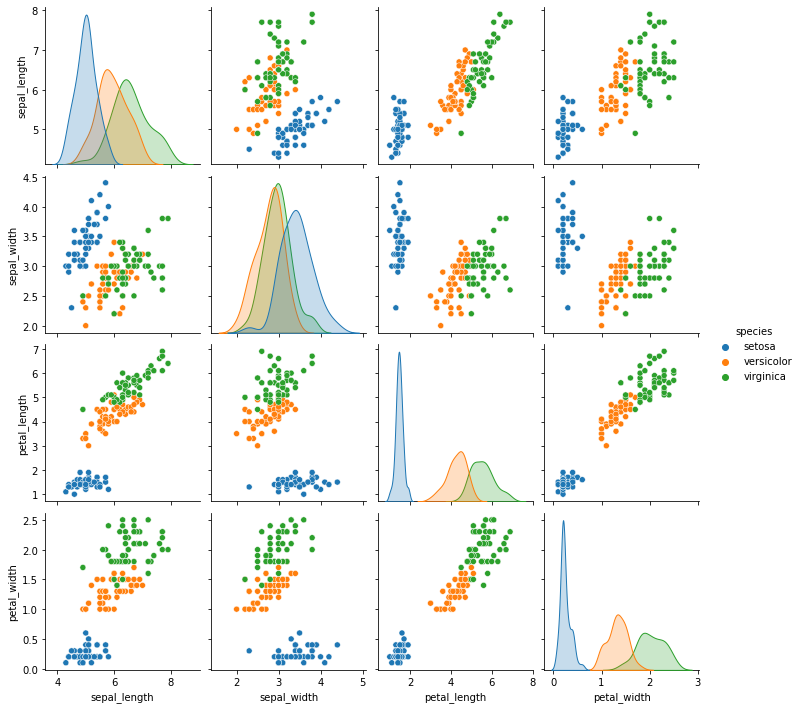

In [4]:
# Reads the csv file into a variable
df = pd.read_csv('../data/iris.csv')
# Plots the species of irises.
sns.pairplot(df, hue="species")

In [5]:
# Prints the first 5 variables of the excel sheet.
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# Removes the column species
X = df.drop('species', axis=1)
# prints the first 5 variables of the variable X.
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# Takes all the unique species names and puts it into a variable.
target_names = df['species'].unique()
# Prints all unique names
target_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
# Makes a dictionary for each unique name and gives them each a value.
target_dict = {n:i for i, n in enumerate(target_names)}
# Prints the dictionary
target_dict

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [9]:
# Maps all the species to a y variable
y= df['species'].map(target_dict)
# Prints the first 5 variables in the variable y.
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [10]:
# Is used to convert vector to binary matrix. Used to convert y into an array. 
# Array contains bool values if it matches one of the species.
# column 1 = setosa
# column 2 = versicolor
# column 3 = virginica
y_cat = to_categorical(y)

In [11]:
# Prints the first 10 values in the array.
y_cat[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [12]:
X.values

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [13]:
# Split arrays or matrices into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat,
                                                    test_size=0.2)

In [14]:
# Test 1 of for the learning rate (Opdracht 5.3 - d)
# Initiates a sequential model.
model = Sequential()
# Adds a hidden/dense layer with the activation softmax. Softmax takes the highest digit and saves cpu usage. 
# It lowers the total amount of code that needs to be written.
model.add(Dense(3, input_shape=(4,), activation='softmax'))
# Learning rate = 0.1
# Compiles the model with the learning rate of 0.1
# Loss function is used to find error or deviation in the learning process.
# Metrics is used to evaluate the performance of your model
# Optimization is an important process which optimize the input weights by comparing the prediction and the loss function.
# Adam is considered to be one of the best optimizers. 
model.compile(Adam(learning_rate=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Trains the model for a fixed number of epochs 
model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
4/4 [==============================] - 1s 50ms/step - loss: 2.6716 - accuracy: 0.2593 - val_loss: 2.2862 - val_accuracy: 0.0000e+00
Epoch 2/20
4/4 [==============================] - 0s 12ms/step - loss: 1.7708 - accuracy: 0.1667 - val_loss: 1.8917 - val_accuracy: 0.1667
Epoch 3/20
4/4 [==============================] - 0s 9ms/step - loss: 1.1914 - accuracy: 0.4074 - val_loss: 1.0580 - val_accuracy: 0.3333
Epoch 4/20
4/4 [==============================] - 0s 11ms/step - loss: 0.9238 - accuracy: 0.4630 - val_loss: 0.6406 - val_accuracy: 0.6667
Epoch 5/20
4/4 [==============================] - 0s 14ms/step - loss: 0.7082 - accuracy: 0.6852 - val_loss: 0.6487 - val_accuracy: 0.6667
Epoch 6/20
4/4 [==============================] - 0s 7ms/step - loss: 0.5751 - accuracy: 0.6944 - val_loss: 0.4362 - val_accuracy: 0.8333
Epoch 7/20
4/4 [==============================] - 0s 8ms/step - loss: 0.5134 - accuracy: 0.8056 - val_loss: 0.4414 - val_accuracy: 0.6667
Epoch 8/20
4/4 [==========

In [15]:
# Generates output predictions for the input samples.
y_pred = model.predict(X_test)
y_pred[:5]

array([[9.7273028e-01, 2.7107678e-02, 1.6199875e-04],
       [9.6244037e-01, 3.7244391e-02, 3.1527181e-04],
       [3.0331195e-03, 2.8232014e-01, 7.1464676e-01],
       [9.7391087e-01, 2.5974719e-02, 1.1434638e-04],
       [5.8590314e-05, 5.6540832e-02, 9.4340062e-01]], dtype=float32)

In [16]:
# Initaties the test and train batch.
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

# Prints a classification report of the test and train batch
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.60      0.75        10
           2       0.67      1.00      0.80         8

    accuracy                           0.87        30
   macro avg       0.89      0.87      0.85        30
weighted avg       0.91      0.87      0.86        30



In [17]:
# Generates an confusion matrix array.
confusion_matrix(y_test_class, y_pred_class)

array([[12,  0,  0],
       [ 0,  6,  4],
       [ 0,  0,  8]], dtype=int64)

In [18]:
# Displays a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Test 2 of for the learning rate (Opdracht 5.3 - d)
# All code bellow is the same as above just that the model has a different learning rate.
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
# Learning rate = 0.05
# Compiles the model with the learning rate of 0.05
model.compile(Adam(learning_rate=0.05),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
4/4 [==============================] - 0s 46ms/step - loss: 1.7674 - accuracy: 0.5648 - val_loss: 0.7054 - val_accuracy: 0.5833
Epoch 2/20
4/4 [==============================] - 0s 7ms/step - loss: 0.9060 - accuracy: 0.5741 - val_loss: 0.6549 - val_accuracy: 0.8333
Epoch 3/20
4/4 [==============================] - 0s 10ms/step - loss: 0.9007 - accuracy: 0.6204 - val_loss: 0.7466 - val_accuracy: 0.5833
Epoch 4/20
4/4 [==============================] - 0s 9ms/step - loss: 0.7986 - accuracy: 0.6389 - val_loss: 0.6475 - val_accuracy: 0.6667
Epoch 5/20
4/4 [==============================] - 0s 7ms/step - loss: 0.6452 - accuracy: 0.6667 - val_loss: 0.4216 - val_accuracy: 0.8333
Epoch 6/20
4/4 [==============================] - 0s 6ms/step - loss: 0.6166 - accuracy: 0.6204 - val_loss: 0.3908 - val_accuracy: 0.8333
Epoch 7/20
4/4 [==============================] - 0s 7ms/step - loss: 0.6020 - accuracy: 0.6574 - val_loss: 0.3820 - val_accuracy: 0.8333
Epoch 8/20
4/4 [================

In [20]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[9.4186366e-01, 5.6299433e-02, 1.8368418e-03],
       [9.1768873e-01, 7.9329148e-02, 2.9821428e-03],
       [4.7684778e-03, 4.5751721e-01, 5.3771430e-01],
       [9.5118749e-01, 4.7433473e-02, 1.3790460e-03],
       [4.4214519e-04, 2.9362902e-01, 7.0592880e-01]], dtype=float32)

In [21]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.90      0.95        10
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [22]:
confusion_matrix(y_test_class, y_pred_class)

array([[12,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  8]], dtype=int64)

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Test 3 of for the learning rate (Opdracht 5.3 - d)
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
# Learning rate = 0.002
# Compiles the model with the learning rate of 0.002
model.compile(Adam(learning_rate=0.002),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
4/4 [==============================] - 0s 40ms/step - loss: 3.5636 - accuracy: 0.5648 - val_loss: 1.9251 - val_accuracy: 0.8333
Epoch 2/20
4/4 [==============================] - 0s 7ms/step - loss: 3.4480 - accuracy: 0.6111 - val_loss: 1.8483 - val_accuracy: 0.8333
Epoch 3/20
4/4 [==============================] - 0s 7ms/step - loss: 3.3340 - accuracy: 0.6296 - val_loss: 1.7771 - val_accuracy: 0.8333
Epoch 4/20
4/4 [==============================] - 0s 8ms/step - loss: 3.2220 - accuracy: 0.6296 - val_loss: 1.7100 - val_accuracy: 0.8333
Epoch 5/20
4/4 [==============================] - 0s 9ms/step - loss: 3.1173 - accuracy: 0.6296 - val_loss: 1.6473 - val_accuracy: 0.8333
Epoch 6/20
4/4 [==============================] - 0s 10ms/step - loss: 3.0131 - accuracy: 0.6296 - val_loss: 1.5901 - val_accuracy: 0.8333
Epoch 7/20
4/4 [==============================] - 0s 8ms/step - loss: 2.9144 - accuracy: 0.6296 - val_loss: 1.5348 - val_accuracy: 0.8333
Epoch 8/20
4/4 [================

In [25]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[0.7495917 , 0.18497998, 0.06542829],
       [0.717734  , 0.20861499, 0.07365102],
       [0.14262886, 0.82269543, 0.03467576],
       [0.77487516, 0.17700776, 0.04811707],
       [0.06299418, 0.91684055, 0.02016518]], dtype=float32)

In [26]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.56      1.00      0.71        10
           2       0.00      0.00      0.00         8

    accuracy                           0.73        30
   macro avg       0.52      0.67      0.57        30
weighted avg       0.59      0.73      0.64        30



F:\Apps\anaconda3\envs\ztdl\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Apps\anaconda3\envs\ztdl\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Apps\anaconda3\envs\ztdl\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
confusion_matrix(y_test_class, y_pred_class)

array([[12,  0,  0],
       [ 0, 10,  0],
       [ 0,  8,  0]], dtype=int64)

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
